# PC Test Environ Maker

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from tangle import Tangle, node_graph, watcher
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

## Experiment 1

This is a test experiment, I didn't need to actually make a conflicting transaction here as we aren't monitoring the orphan status of the original transaction. We are instead measuring the number of tip confirmations.

This experiment will test the number of tip confirmations of a system built with a parasite chain and a system with the same number of transactions without the parastie chain.

### PC Tangle

In [6]:
t = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng = node_graph(t)
w = watcher(t, ng)
for n in range(4):
    ng.new_node()

ng.new_node(mal=True, watch=w)

for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

ng.nodes[-1].issue_bad_transaction()
PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
w.update()
ng.nodes[-1].spam_transactions(10)
badNode = ng.nodes[-1]
print(badNode.chain)

for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001BE29194A70>]
Edges []
Node IDS [0]
Weights [[0, 1370, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001BE29194A70>, <tangle.node object at 0x000001BE291979E0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1370, 1], [1, 671, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001BE29194A70>, <tangle.node object at 0x000001BE291979E0>, <tangle.node object at 0x000001BE29194C20>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1370, 1], [1, 671, 1], [2, 876, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001BE29194A70>, <tangle.node object at 0x000001BE291979E0>, <tangle.node object at 0x000001BE29194C20>, <tangle.node object at 0x000001BE29196F90>]
Edges [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1370, 1], [1, 671, 1], [2, 876, 1], [3, 1713, 1]]
Finished u

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 9, 9, 9, 9, 12, 12, 13] [1.0, 1.0918495236560317, 1.806457015625332, 1.8341773669645633, 1.8686189105873576, 2.0326035489222334, 3.065499404759663, 3.8468865984072043, 3.9518385223903842, 4.340735647710677, 4.383982909730943, 5.993068468906417, 7.113667740210447, 7.4123450829195034, 7.731793958070714, 7.832194949782986, 7.9464976093899375, 7.94689502653952, 8.26753446711663, 8.390510821975317, 8.57095860932575, 8.824182238249051, 8.826672647610252, 9.102001056344289, 9.268870411394891, 9.303173804772815, 9.762169549978598, 9.87403988750443]
4.340735647710677


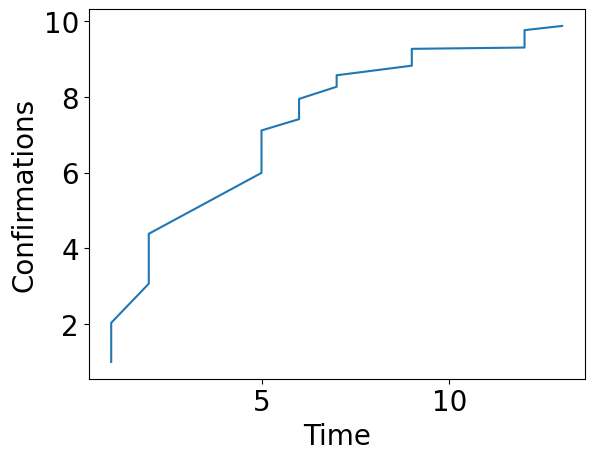

In [7]:
w.plot_confirm_over_time()
print(PC_issue_time)

### Non-PC Tangle

In [8]:
t2 = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng2 = node_graph(t2)
w2 = watcher(t2, ng2)

for n in range(4):
    ng2.new_node()


for j in range(9):
    for i in range(4):
        ng2.nodes[i].issue_transaction()
        w2.update()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001BE28C5B0B0>]
Edges []
Node IDS [0]
Weights [[0, 332, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001BE28C5B0B0>, <tangle.node object at 0x000001BE290CCEF0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 332, 1], [1, 1570, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001BE28C5B0B0>, <tangle.node object at 0x000001BE290CCEF0>, <tangle.node object at 0x000001BE2C37C980>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 332, 1], [1, 1570, 1], [2, 1987, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001BE28C5B0B0>, <tangle.node object at 0x000001BE290CCEF0>, <tangle.node object at 0x000001BE2C37C980>, <tangle.node object at 0x000001BE2C37FDD0>]
Edges [(1, 0), (2, 1), (2, 0), (3, 0), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 332, 1], [1, 1570, 1], [2, 1987, 1], [3, 607, 1]]
Tips 0 0
2

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 10, 10, 12, 12, 13, 16, 16, 17, 17, 19, 22] [1.0, 1.2275739630690747, 1.241609807608104, 1.51127194449003, 1.8577848699643176, 2.771594110734924, 3.058671745237612, 3.346533719325286, 3.369859288316413, 3.747542532885049, 4.0013066980265295, 4.099143704072814, 4.136399495112682, 4.3292416790647685, 4.383064151407612, 4.669114023438677, 4.670903254803733, 5.8731080986629, 6.125509059303763, 6.22999592334114, 6.4192787938271945, 6.643642043340943, 7.343003092678519, 8.216900890496596, 8.484314428291125, 9.002806966595926, 9.302630495003996, 9.315023064593735, 9.807827534679875, 9.98249455975845, 10.116185250072125, 10.3639799890298, 10.782750804929485, 11.186894711725758, 11.2348588700881, 11.346256569613468, 11.444354405147594]


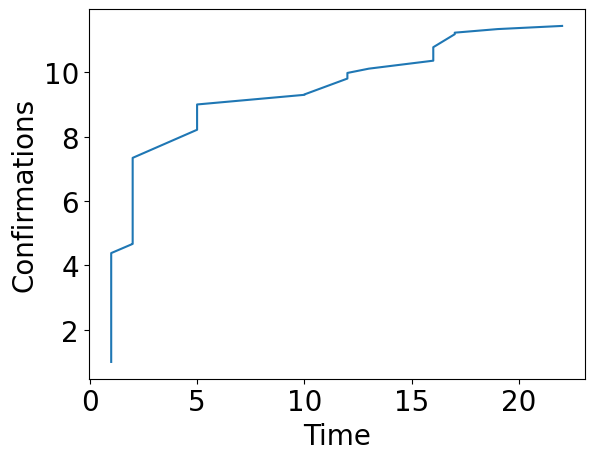

In [9]:
w2.plot_confirm_over_time()